# Einführung in künstliche Intelligenz und Machine Learning
---

## Modell zur Vorhersage von Gebrauchtwagenpreisen

| Name | Simon Schmetz |
| --- | --- |
| Email | schmetz@hm.edu |
| Matrikelnummer |  |

In [2]:
import requests #Für deb direkten Import der Daten

#Init Imports
import matplotlib.pyplot as plt #Visualization Lib
import seaborn as sns; sns.set(); #Data visualization Lib
import numpy as np #Scientific cumputing package, Array management
import pandas as pd
import datetime

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [3]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

#Def general fnctns

#Import of test and train data
def import_data():
    df_train = pd.read_csv('bike-sharing-demand/train.csv')
    df_test = pd.read_csv('bike-sharing-demand/test.csv')

    return df_train, df_test

#Add daytimes frome datetime
def add_daytimes(df):
    df['datetime'] = pd.to_datetime(df['datetime'])

    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    return df


#Evaluate mean squared Error score, mean absolute erro & mean absolute percantage error

def scoring (y_test, y_pred):
    #calc scores
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    errorpercantage = mean_absolute_percentage_error(y_test,y_pred)
    RMSLE = mean_squared_log_error(y_test, y_pred, squared=False)

    #print scores
    print('Mean Squared Error Score:',MSE)
    print('Mean Absolute Error Score:',MAE)
    print('Average Errorpercantage:',errorpercantage)
    print('Root Mean Squared log Error', RMSLE)
    print('\n')

    return MSE, MAE, errorpercantage


#learncurve function
def lcurve(estimator,x_data, y_data, train_sizes):
    #train_sizes = [0.2, 0.4, 0.6, 0.8]
    #Learncurve generation
    train_sizes = train_sizes
    train_sizes, train_scores, test_scores = learning_curve(estimator,x_data,y_data, train_sizes = train_sizes, random_state=0)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    #Plotting
    plt.plot(train_sizes, train_scores_mean, color = 'blue', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, color = 'red', label = 'Test Scores')
    plt.hlines(np.mean([train_scores[-1], test_scores[-1]]), train_sizes[0], train_sizes[-1], color='gray', linestyle='dashed') # Convergence Line
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.show()
    
    print('Training score of max training size:', train_scores_mean[-1])
    print('Test score of max training size:', test_scores_mean[-1])


## Import des Test und des Trainingssets

In [4]:
#Import Data
df_train, df_test = import_data()

#Display train data attributes 
display(df_train.head())
display(df_train.info())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

In [5]:
#Display train data attributes 
display(df_test.head())
display(df_train.info())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

Dataform

datetime: 
hourly date + timestamp

season: 
season: 1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday: 
whether the day is considered a holiday

workingday:  
whether the day is neither a weekend nor holiday

weather: 
1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp:
temperature in Celsius

atemp:
"feels like" temperature in Celsius

humidity:
relative humidity

windspeed:
wind speed

casual: 
number of non-registered user rentals initiated

registered:
number of registered user rentals initiated

count:
number of total rentals


## Rawdata Analysis and Visualization

In [6]:
#Show max and min values to check for out of bounds/unrealistic values
print("Max temperature: ", df_train['temp'].max())
print("Min temperature: ", df_train['temp'].min())
print("Max felt temperature: ", df_train['atemp'].max())
print("Min felt temperature: ", df_train['atemp'].min())
print("Max humidity: ", df_train['humidity'].max())
print("Max windspeed: ", df_train['windspeed'].max())
print("Max casual drivers: ", df_train['casual'].max())
print("Max registered drivers: ", df_train['registered'].max())
print("Max absolut drivers: ", df_train['count'].max())

Max temperature:  41.0
Min temperature:  0.82
Max felt temperature:  45.455
Min felt temperature:  0.76
Max humidity:  100
Max windspeed:  56.9969
Max casual drivers:  367
Max registered drivers:  886
Max absolut drivers:  977


In [7]:
#feature Engineering to improve visualization
df_train['season'] = df_train['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_train['weather'] = df_train['weather'].map({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
    })


#Split datetime in individual Variables
add_daytimes(df_train)
add_daytimes(df_test)

#create weekday count 
df_train['weekday'] = df_train['datetime'].dt.weekday



#Show resulting Dataframes
display(df_train.head())
display(df_test.head())



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


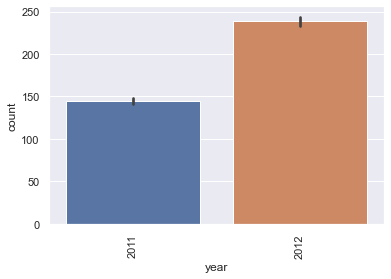

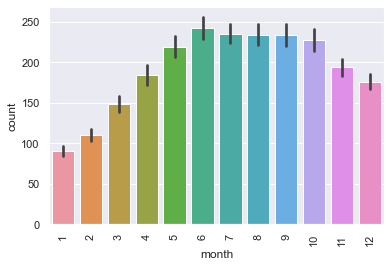

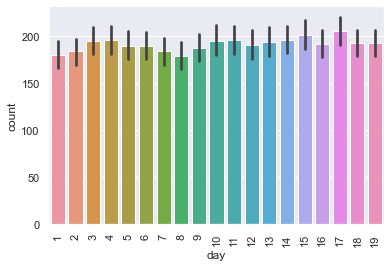

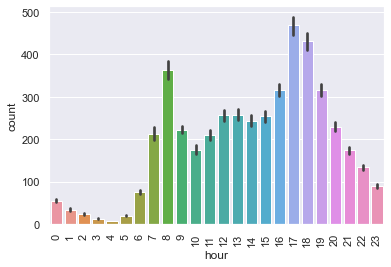

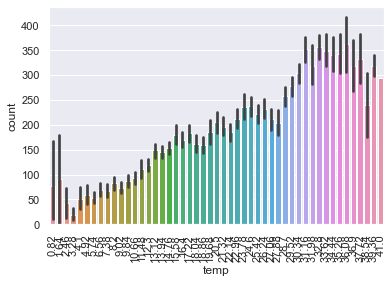

In [8]:
for feature in ['year', 'month', 'day', 'hour','temp']:
    sns.barplot(x = feature, y = 'count', data = df_train)
    plt.xticks(rotation=90)
    plt.show()
    
    

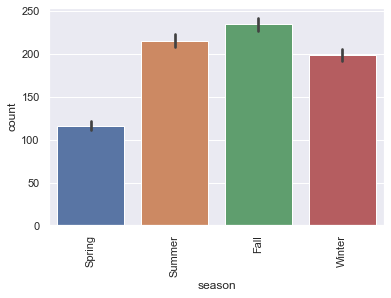

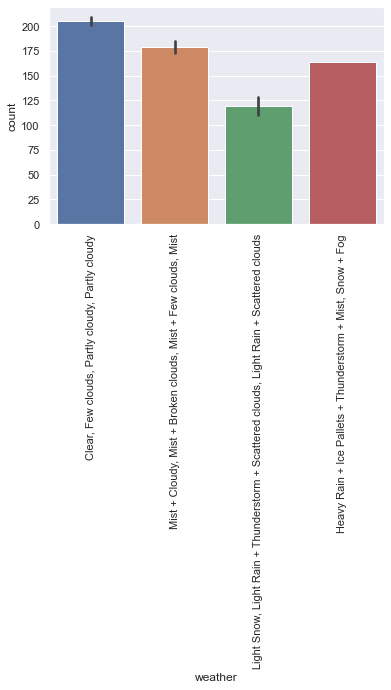

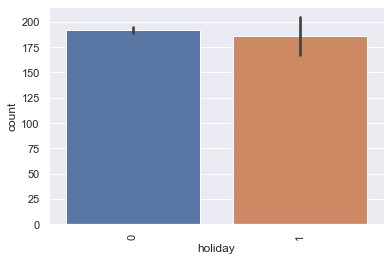

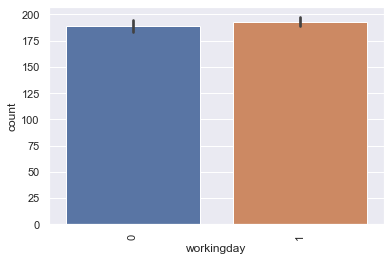

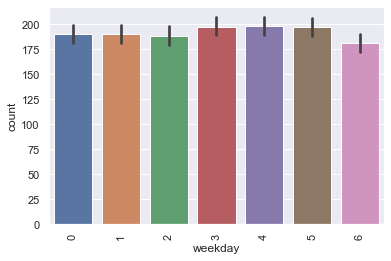

In [9]:

for feature in ['season', 'weather', 'holiday','workingday','weekday'] : 
    sns.barplot(x = feature, y = 'count', data = df_train)
    plt.xticks(rotation=90)
    plt.show()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

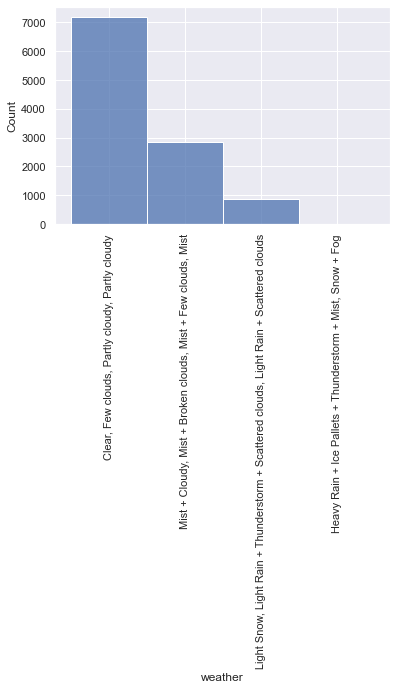

In [10]:
sns.histplot(data=df_train, x="weather")
plt.xticks(rotation=90)

In [11]:
print('Cases of Heavy rain in training data:',df_train[df_train['weather'] ==  'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'].count()['count'])
print('Cases of Heavy rain in test data:',df_test[df_test['weather'] ==  'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'].count()['weather'])

Cases of Heavy rain in training data: 1
Cases of Heavy rain in test data: 0


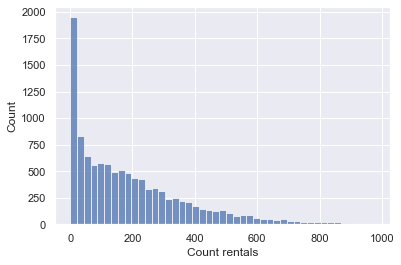

[Text(0.5, 0, 'Count rentals')]

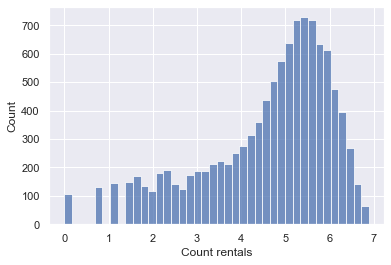

In [12]:
fig = sns.histplot(data=df_train, x="count")
fig.set(xlabel='Count rentals')
plt.show()

x = np.log(df_train['count'])
fig2 = sns.histplot(np.log(df_train['count']))
fig2.set(xlabel='Count rentals')

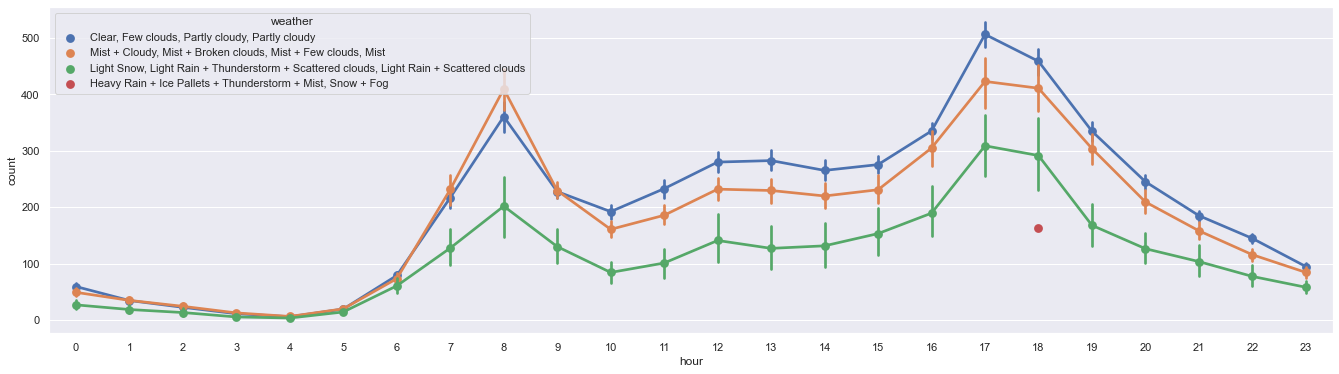

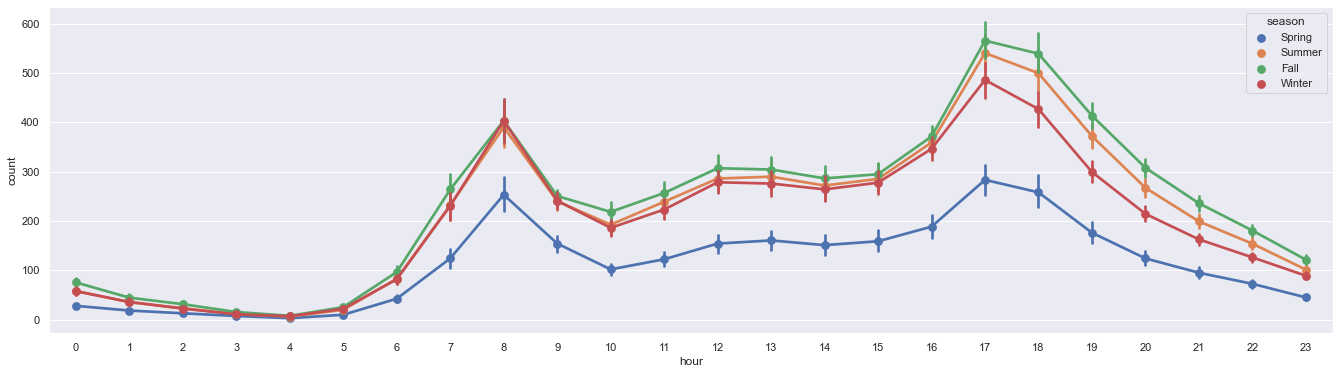

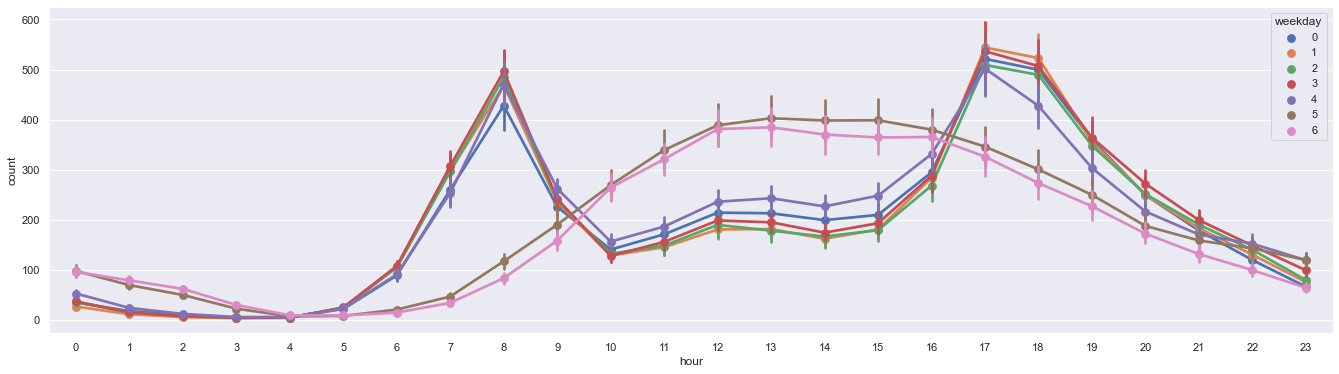

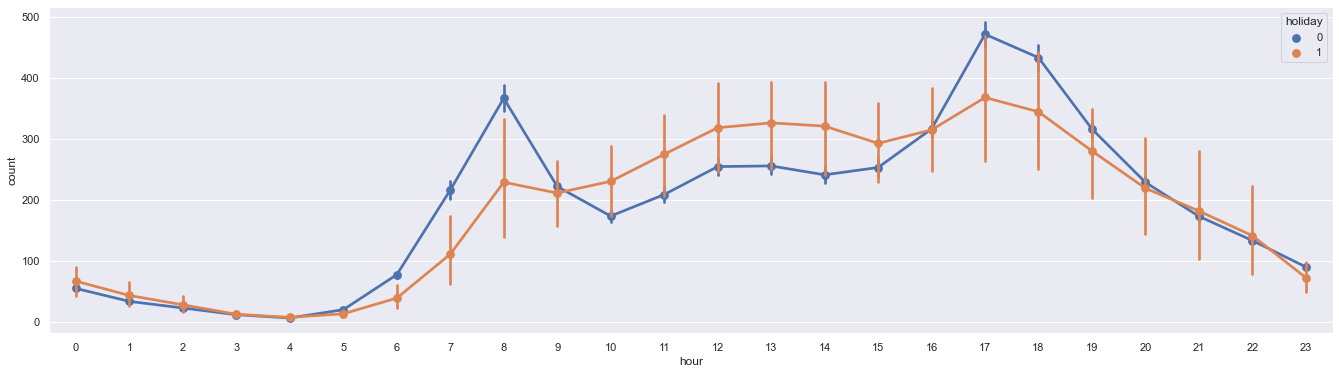

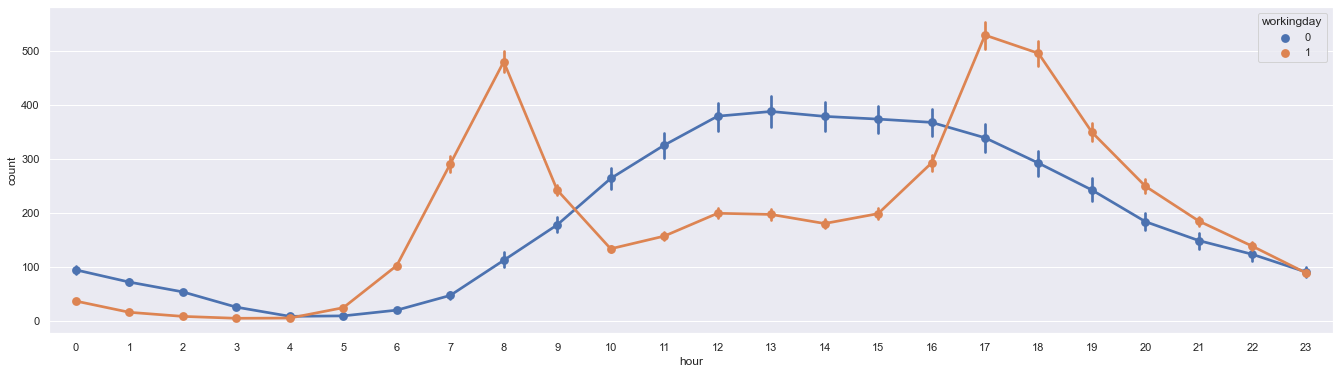

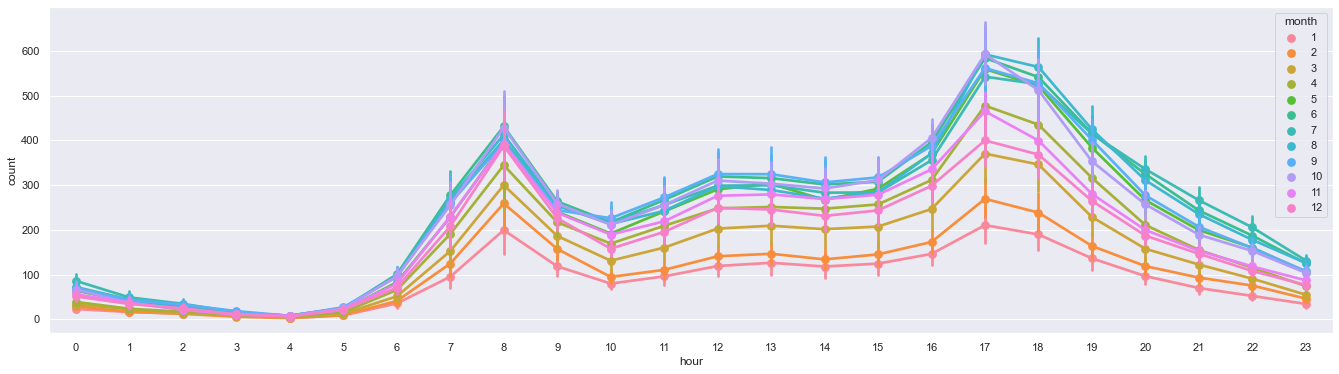

In [13]:
for feature in ['weather','season','weekday','holiday','workingday','month']:
    plt.figure(figsize= (23,6))
    sns.pointplot(x = 'hour',y = 'count', data= df_train, hue= feature)
    plt.show()
    

<AxesSubplot:>

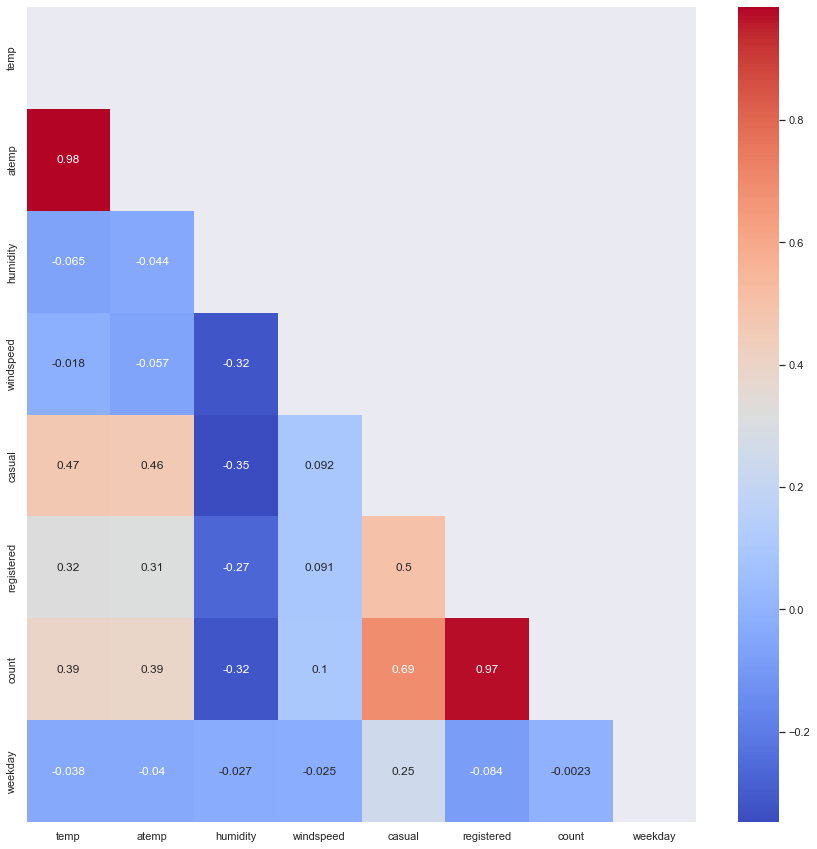

In [14]:
#Correlation heatmap 
#Standard Correlation: Pearson Correlation Coefficient

df_train_corr = df_train.drop(columns=['workingday','holiday','year','month','day','hour'])
plt.figure(figsize= (15,15))
sns.heatmap(df_train_corr.corr(), annot=True, cmap= 'coolwarm', mask = np.triu(df_train_corr.corr()))


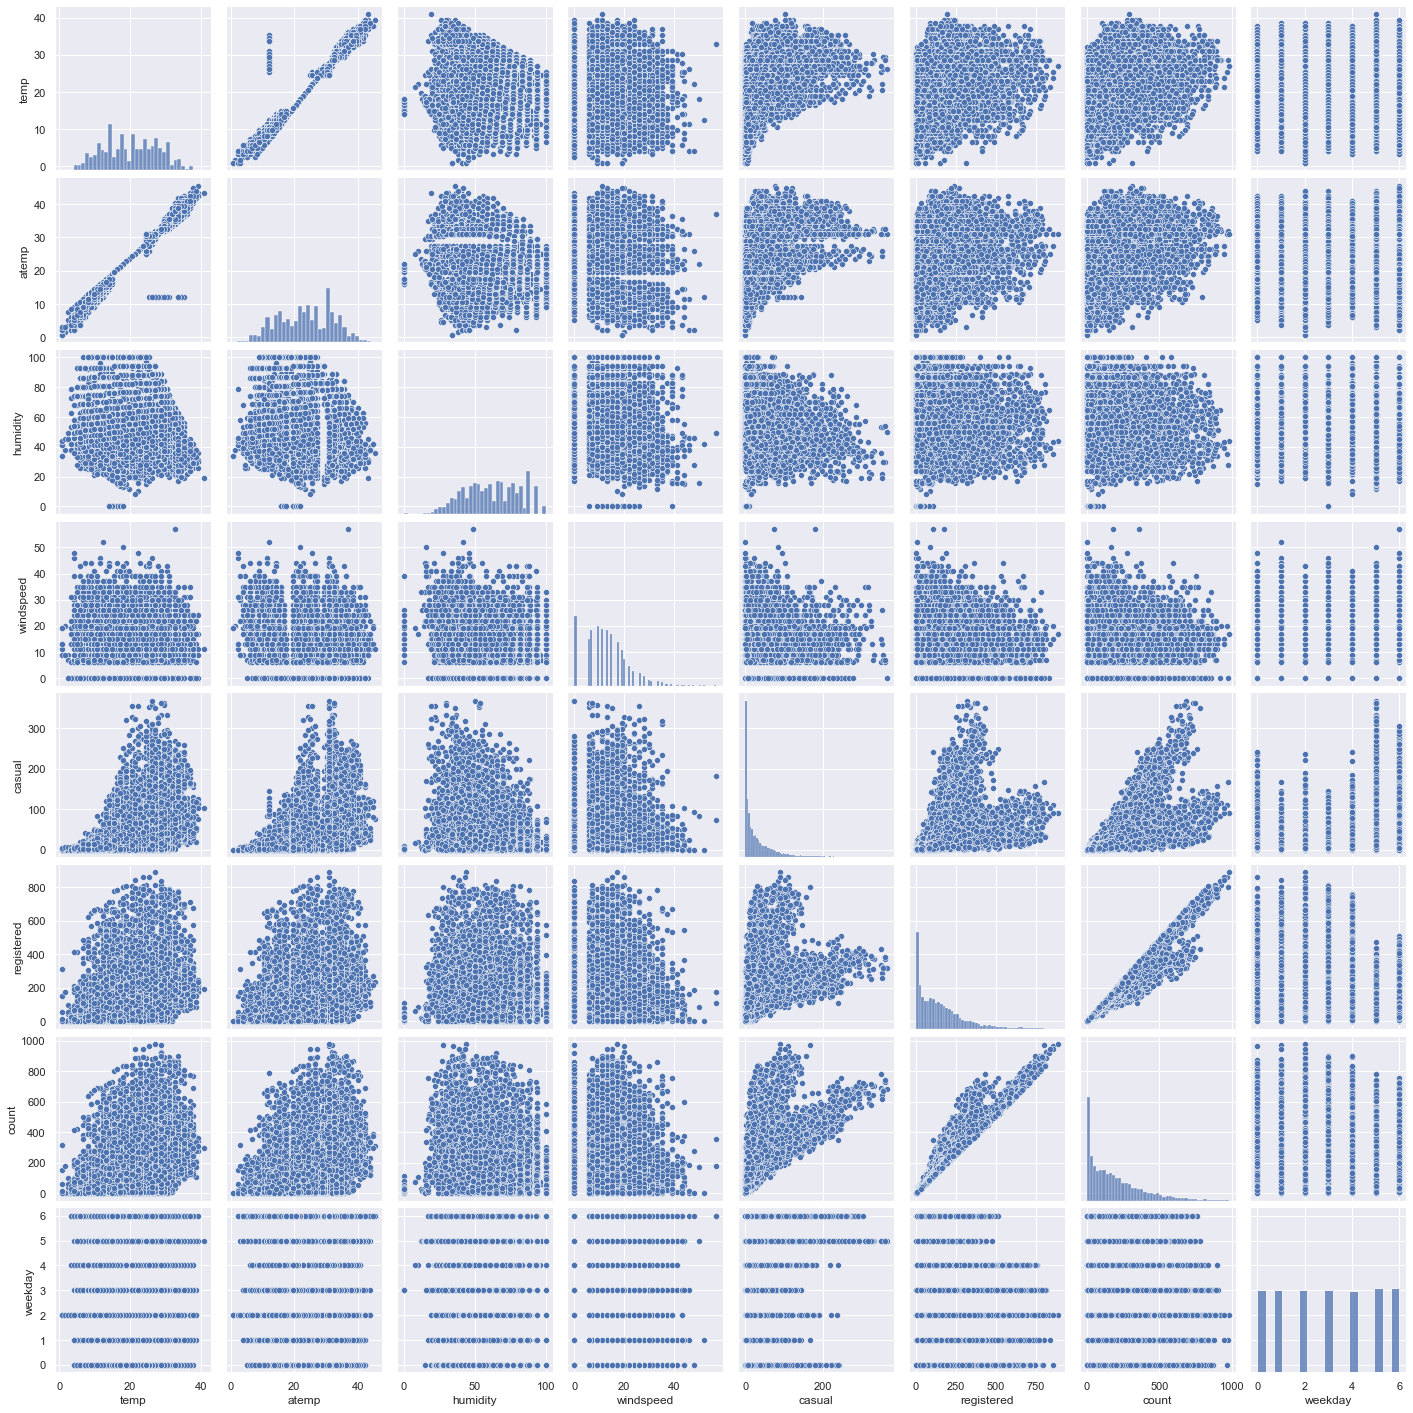

In [15]:
sns.pairplot(df_train_corr)

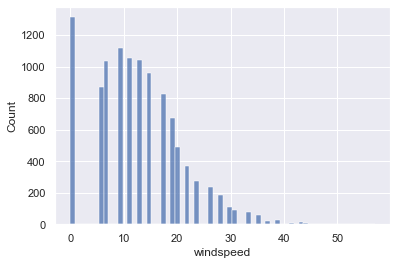

<AxesSubplot:xlabel='humidity', ylabel='Count'>

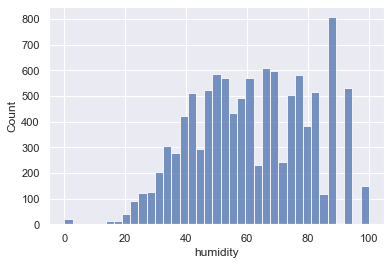

In [16]:
sns.histplot(data=df_train, x="windspeed")
plt.show()
sns.histplot(data=df_train, x="humidity")

https://www.meteoblue.com/en/weather/historyclimate/climatemodelled/washington-d.c._united-states_4140963
Die Anzahl der Tage mit Windspeed = 0 ist icht mit der Wetterstatistik überein zu bringen, es kann von fehlerhaften Daten ausgegangen werden
df_train['windspeed'].value_counts()

In [17]:
windspeed0_count_train = (df_train['windspeed']==0).sum()
print('Occcurence of hours in which windspeed = 0 in train data:',windspeed0_count_train)

windspeed0_count_test = (df_test['windspeed']==0).sum()
print('Occcurence of hours in which windspeed = 0 in test data:',windspeed0_count_test)

windspeed0_count_test = (df_test['windspeed']==0).sum()
print('Occcurence of hours in which windspeed = 0 in test data:',windspeed0_count_test)

Occcurence of hours in which windspeed = 0 in train data: 1313
Occcurence of hours in which windspeed = 0 in test data: 867
Occcurence of hours in which windspeed = 0 in test data: 867


# Feature engineering & Data Preperation

Random Forest Regressor
Mean Squared Error Score: 22.917455724149615
Mean Absolute Error Score: 3.6012761049449016
Average Errorpercantage: 0.29406233063158554
Root Mean Squared log Error 0.31342759184538743


Decision Tree Regressor
Mean Squared Error Score: 42.71861934088973
Mean Absolute Error Score: 4.521531662489557
Average Errorpercantage: 0.3608331567462186
Root Mean Squared log Error 0.4203919582702274


Linear Regressor
Mean Squared Error Score: 39.89705222286063
Mean Absolute Error Score: 5.001262150246935
Average Errorpercantage: 0.42486714828915906
Root Mean Squared log Error 0.40745520913272276




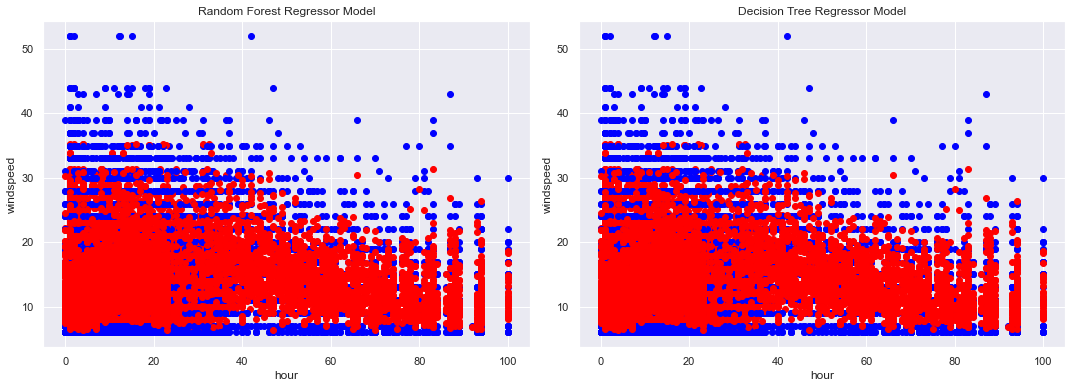

In [18]:
#Erkennbar das der windspeed unverhältnismäßig viele Werte = 0 hat
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

# Merge train and test Data to train Windfill Model
df_train, df_test = import_data()

#Add daytimes from datetime
add_daytimes(df_train)
add_daytimes(df_test)


df = df_train

#sort into Windspeed = 0/Windspeed not = 0
wind_0 = df[df['windspeed'] == 0]
wind_not0 = df[df['windspeed'] != 0]

y_wind_not0= wind_not0['windspeed']
x_wind_not0 = wind_not0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']]

x_wind_train, x_wind_test, y_wind_train, y_wind_test = train_test_split(x_wind_not0,y_wind_not0,test_size=0.25,random_state=0)


#print('\n', x_wind_train.head())
#print('\n',y_wind_train.head())
#print('\n', x_wind_test.head())
#print('\n',y_wind_test.head())
#print('\n')

#Define Models to be trained
wind_rfregressor = RandomForestRegressor(random_state=0)
wind_dtregressor = DecisionTreeRegressor(random_state=0)
wind_linearregressor = LinearRegression()

#Train Models
wind_rfregressor.fit(x_wind_train,y_wind_train.astype('int'))
wind_dtregressor.fit(x_wind_train,y_wind_train)
wind_linearregressor.fit(x_wind_train,y_wind_train)


#Predict  with trained Models for rows: wind = 0 

y_wind_pred_rfregressor = wind_rfregressor.predict(x_wind_test)
y_wind_pred_dtregressor = wind_dtregressor.predict(x_wind_test)
y_wind_pred_linearregressor = wind_linearregressor.predict(x_wind_test)


#Score Models
print('Random Forest Regressor')
MSE_wind_rfregressor, MAE_wind_rfregressor, errorpercantage_wind_rfregressor =scoring(y_wind_test,y_wind_pred_rfregressor)

print('Decision Tree Regressor')
MSE_wind_dtregressor, MAE_wind_dtregressor, errorpercantage_wind_dtregressor =scoring(y_wind_test,y_wind_pred_dtregressor)

print('Linear Regressor')
MSE_wind_linearregressor, MAE_wind_linearregressor, errorpercantage_wind_linearregressor =scoring(y_wind_test,y_wind_pred_linearregressor)


#Plotting  Results of compared Models ---------------------------------------------------------- fix 

fig, ax = plt.subplots(1,2, figsize = (16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax = ax.ravel()
for feature in ['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']:

    #print(feature)

    # Plot Rand Forest Regressor Results
    ax[0].scatter(x = x_wind_test[feature], y = y_wind_test, color = 'blue')
    ax[0].scatter(x = x_wind_test[feature], y = y_wind_pred_rfregressor, color = 'red')
    ax[0].set_title('Random Forest Regressor Model')

    #Plot Decision Tree Regressor Results
    ax[1].scatter(x = x_wind_test[feature], y = y_wind_test, color = 'blue')
    ax[1].scatter(x = x_wind_test[feature], y = y_wind_pred_rfregressor, color = 'red')
    ax[1].set_title('Decision Tree Regressor Model')

    #Cosmetics
    ax[0].set_xlabel(feature)
    ax[1].set_xlabel(feature)

    ax[0].set_ylabel("windspeed")
    ax[1].set_ylabel("windspeed")

    #Show Iterations



# Fill Wind = 0 with chosen ML Model

In [27]:

# Merge train and test Data to train Windfill Model
df_train, df_test = import_data()

#Add daytimes from datetime
add_daytimes(df_train)
add_daytimes(df_test)

df_merged = pd.concat([df_train, df_test],axis=0)
df_merged.tail()




#Train Model with merged Data
df = df_merged

#Sperate in Wind == 0 and Wind != 0
wind_0 = df[df['windspeed'] == 0]
wind_not0 = df[df['windspeed'] != 0]

#Split training Data (Wind !=0) in features and target value (Windspeed)
y_wind_train= wind_not0['windspeed']
x_wind_train = wind_not0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']]

#Train Random Forest Regression Model
wind_rfregressor = RandomForestRegressor(random_state=0)
wind_rfregressor.fit(x_wind_train,y_wind_train)

#Use Model individually for train & test data

df_train.head()
#df_train.tail()

def wind_fill(df):

    print(df.shape[0]) #check row count of df 

    #seperate df in Windspeed == 0 and Windspeed !=0
    df_wind_0 = df[df['windspeed'] == 0]
    df_wind_not0 = df[df['windspeed'] != 0]

    #predict missing Wind Values
    df_wind_0['windspeed'] = wind_rfregressor.predict(df_wind_0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']])

    #merge wind = 0 and wind != 0 dataframes 
    df_wind_filled = pd.concat([df_wind_not0,df_wind_0])
    df_wind_filled = df_wind_filled.sort_index()

    #return filled dataframe
    df = df_wind_filled

    print(df.shape[0]) # check row count of df to prevent data loss
    
    return df


#Fill Winddata 
df_train = wind_fill(df_train)
df_test = wind_fill(df_test)


#Check for cases Wind == 0 
print((df_train['windspeed']==0).sum())
print((df_test['windspeed']==0).sum())


10886
10886
6493
6493
0
0


/var/folders/2j/t8d8dcsn1tg5sc8l4kz4_4ch0000gn/T/ipykernel_62865/819229296.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_0['windspeed'] = wind_rfregressor.predict(df_wind_0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']])
/var/folders/2j/t8d8dcsn1tg5sc8l4kz4_4ch0000gn/T/ipykernel_62865/819229296.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_0['windspeed'] = wind_rfregressor.predict(df_wind_0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day

In [28]:
#throw out bad weather collum due to insuffiecient training data (only 1 occurence)
df_train = df_train.drop(df_train[df_train.weather == 4 ].index)
print(df_train[df_train.weather == 4].count()['count'])

0


# Modell Evaluation

In [21]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

In [31]:

#df_train = pd.read_csv('bike-sharing-demand/train.csv')
#df_train['datetime'] = pd.to_datetime(df_train['datetime'])

#df_train['year'] = df_train['datetime'].dt.year
#df_train['month'] = df_train['datetime'].dt.month
#df_train['day'] = df_train['datetime'].dt.day
#df_train['hour'] = df_train['datetime'].dt.hour


#y_train = df_train['count']
#x_train = df_train.drop(columns=['datetime', 'count','casual','registered'])
display(df_train.head())
display(df_test.head())


features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'month', 'day', 'hour']

x_train_eval, x_test_eval, y_train_eval, y_test_eval = train_test_split(df_train[features],df_train['count'],test_size=0.25,random_state=0)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,7.392646,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,7.062671,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.602783,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.472870,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.222960,0,1,1,2011,1,1,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,10.489185,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,10.089262,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,4


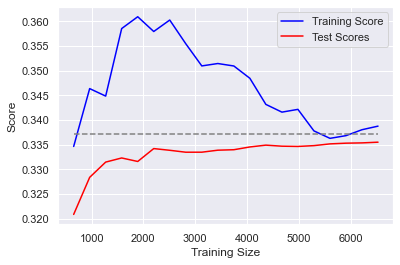

Training score of max training size: 0.3387597521009446
Test score of max training size: 0.33550365538147753


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour
10821,4,0,1,2,14.76,17.425,93,8.998100,12,17,7
2666,2,0,0,1,28.70,32.575,65,9.699335,6,19,0
7475,2,0,1,1,21.32,25.000,40,22.002800,5,10,20
5094,4,0,1,2,18.86,22.725,94,12.998000,12,6,8
1714,2,0,0,1,15.58,19.695,46,26.002700,4,17,8


10821    319
2666      89
7475     374
5094     414
1714      43
Name: count, dtype: int64

,0
0,season holiday workingday weather t...
1,6639 170 7976 681 5916 450 8051 38...


,0
0,season holiday workingday weather t...
1,"[271.2860048760491, 214.26957181067573, 200.57..."


[271.28600488 214.26957181 200.5769662  ... 163.21693551 302.35456999
 170.13308571]


ValueError: Found input variables with inconsistent numbers of samples: [2722, 10886]

In [33]:
estimator = LinearRegression()
train_sizes = np.linspace(0.1,1,20)

lcurve(estimator,x_train_eval , y_train_eval, train_sizes)

display(x_train_eval.head())
display(y_train_eval.head())


estimator.fit(x_train_eval,y_train_eval) 
y_pred = estimator.predict(x_test_eval)


def pred_visualization(x_test, y_test, y_pred):

    x_test['count ']

    df_eval_test = x_test.merge(y_test.rename('count'))
    df_eval_pred = pd.DataFrame([[x_test],[y_pred]])

    display(df_eval_test.head())
    display(df_eval_pred.head())

    #sns.pairplot()
    #for feature in ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'month', 'day', 'hour']:
    #    plt.scatter(x_test[feature], y_test, c = 'blue')
    #    plt.scatter(x_test[feature], y_pred, c = 'red')
    #    plt.xlabel(feature)
    #    plt.ylabel('Rental count')
    #    plt.show()

pred_visualization(x_test_eval,y_test_eval,y_pred)

print(y_pred)
#print(y_pred[y_pred < 0].count())

scoring(y_pred, y_train)


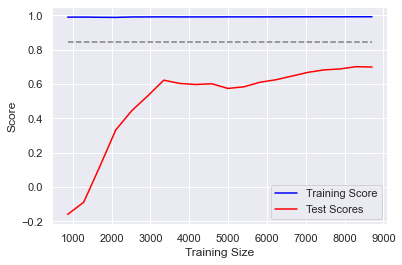

Training score of max training size: 0.9922311846987162
Test score of max training size: 0.6992813622532011


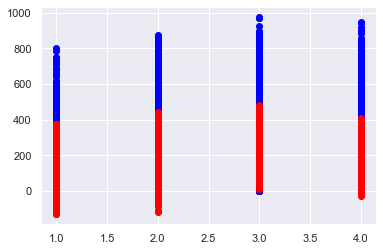

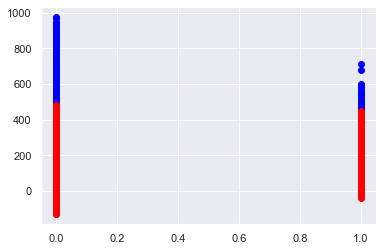

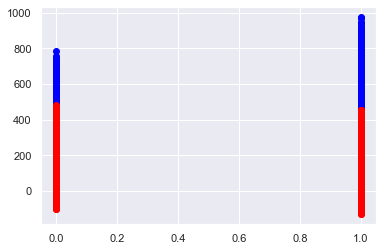

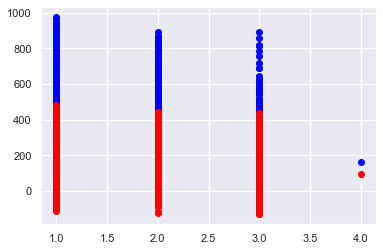

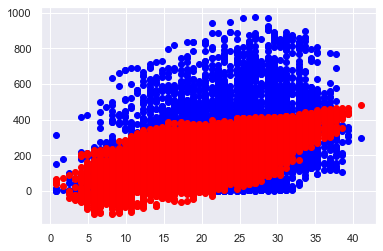

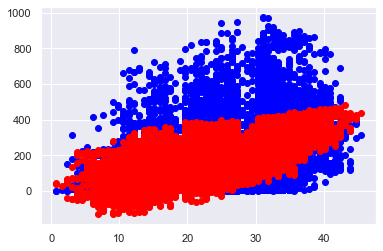

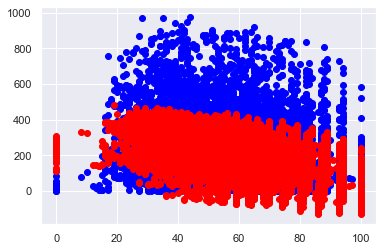

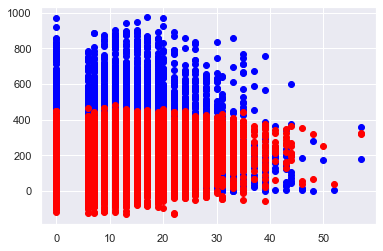

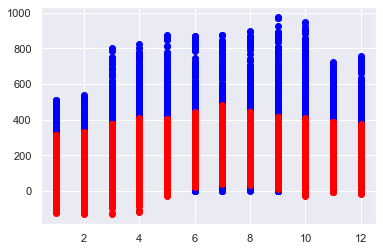

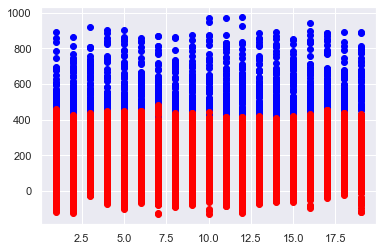

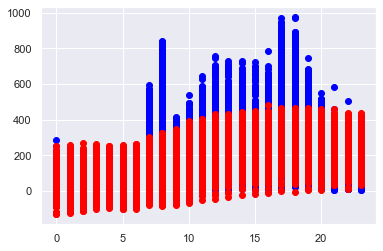

Mean Squared Error Score: 248.11541016902447
Mean Absolute Error Score: 9.785242513319862
Average Errorpercantage: 0.0882983050134172
Root Mean Squared log Error 0.15414179051539895




(248.11541016902447, 9.785242513319862, 0.0882983050134172)

In [25]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(random_state = 0)
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator, x_train, y_train, train_sizes)

for feature in ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'month', 'day', 'hour']:
    plt.scatter(x_train[feature], y_train, c = 'blue')
    plt.scatter(x_train[feature], y_pred, c = 'red')  
    plt.show()


estimator.fit(x_train,y_train) 
y_pred = estimator.predict(x_train)
scoring(y_pred, y_train)



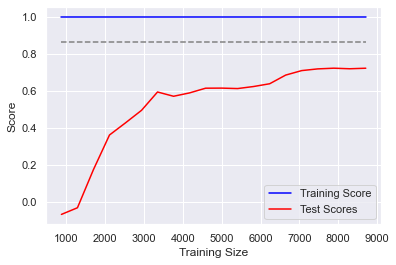

Training score of max training size: 0.9999999985698184
Test score of max training size: 0.7218346024174318
Mean Squared Error Score: 2.2340620981074826e-05
Mean Absolute Error Score: 0.00011390777144956386
Average Errorpercantage: 4.639983247281471e-07
Root Mean Squared log Error 1.925969341533403e-05




(2.2340620981074826e-05, 0.00011390777144956386, 4.639983247281471e-07)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
estimator = ExtraTreesRegressor(random_state=0)
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator,x_train , y_train, train_sizes)

estimator.fit(x_train,y_train) 
y_pred = estimator.predict(x_train)
scoring(y_pred, y_train)

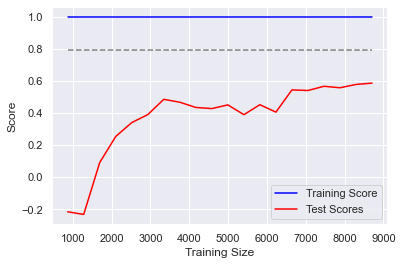

Training score of max training size: 1.0
Test score of max training size: 0.586120065860108
Mean Squared Error Score: 0.0
Mean Absolute Error Score: 0.0
Average Errorpercantage: 0.0
Root Mean Squared log Error 0.0




(0.0, 0.0, 0.0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(random_state=0)
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator,x_train, y_train, train_sizes)

estimator.fit(x_train,y_train) 
y_pred = estimator.predict(x_train)
scoring(y_pred, y_train)


In [ ]:
def PolynomialRegression(degree=2, **kwargs): 
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))


estimator = PolynomialRegression(4)
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator,x , y, train_sizes)

NameError: name 'make_pipeline' is not defined